# Question 2  Single Loan

This notebook aim is twofold:

(1) Explore the data in the simple case of a single loan

(2) Perform the operation required by Question 2 in the case of a single loan. This allows us to get clarity and check that the operations are correct in a simpler context. This will also help us for scaling, since once we have entire portfolio we can divide the work in individual task (one per-loan).

In [1]:

from portfolio_model import Loans_Portfolio

import pandas as pd
import datetime

import matplotlib.pyplot as plt

pd.options.display.float_format = "{:,.2f}".format
pd.options.mode.copy_on_write = True

In [1]:

mystyle = '../style/pastel-light.mplstyle'
plt.style.use(mystyle)
%config InlineBackend.figure_format='retina'

In [2]:
cob = datetime.date(2022, 12, 31)  # 31/12/2022
ss_path = '../data/2024_Strat_Casestudy.xlsx'

We create the portfolio object and consolidate the data (as per Question 1).

In [3]:
portfolio = Loans_Portfolio(cob_date=cob, data_path=ss_path)

In [4]:
portfolio.consolidate_data()

In [5]:
data = portfolio.data

We extract the data for a single loan by filtering by `loan_id`.

In [6]:
idx = 1606
df = data[data.loan_id == idx]

In [7]:
df

,loan_id,level_1,Balance,Payment_Due,Payment_Made,origination_date,investor_1_acquisition_date,reversion_date,original_balance,product,pre_reversion_fixed_rate,post_reversion_boe_margin
41738,1606,2021-11-30,"215,105.00",NaN,NaN,2021-11-30,2021-11-30,2023-11-30,215105,2,0.03,0.02
41739,1606,2021-12-31,"215,105.00",543.95,543.95,2021-11-30,2021-11-30,2023-11-30,215105,2,0.03,0.02
41740,1606,2022-01-31,"215,105.00",543.95,543.95,2021-11-30,2021-11-30,2023-11-30,215105,2,0.03,0.02
41741,1606,2022-02-28,"215,105.00",543.95,543.95,2021-11-30,2021-11-30,2023-11-30,215105,2,0.03,0.02
41742,1606,2022-03-31,"215,105.00",543.95,0.00,2021-11-30,2021-11-30,2023-11-30,215105,2,0.03,0.02
41743,1606,2022-04-30,"215,105.00",543.95,"1,087.91",2021-11-30,2021-11-30,2023-11-30,215105,2,0.03,0.02
41744,1606,2022-05-31,"215,105.00",543.95,543.95,2021-11-30,2021-11-30,2023-11-30,215105,2,0.03,0.02
41745,1606,2022-06-30,"215,105.00",543.95,543.95,2021-11-30,2021-11-30,2023-11-30,215105,2,0.03,0.02
41746,1606,2022-07-31,"215,105.00",543.95,0.00,2021-11-30,2021-11-30,2023-11-30,215105,2,0.03,0.02
41747,1606,2022-08-31,"215,105.00",543.95,0.00,2021-11-30,2021-11-30,2023-11-30,215105,2,0.03,0.02


Please add the following calculated columns to the dataframe (plus any others you found helpful). 


## Dynamic Columns 

These vary by loan and by calendar month:

- current_balance: The current balance outstanding for each loan and month.
- seasoning: The integer number of months since the loan was originated at each month.
- n_missed_payments: number of missed payments in a row.
- prepaid_in_month: a flag indicating that the borrower prepaid in a given month.
- default_in_month: a flag indicating that the borrower defaulted in a given month.
- recovery_in_month: a flag indicating that a recovery has been made post-default in a given month.
- is_recovery_payment: a flag indicating whether the associated payment has been made post-default.
- time_to_reversion: The integer number of months until the laon reverts. This is negative if the - loan is before reversion and 0 at the month of reversion.
- is_post_seller_purchsae_date: Is this time period after the seller purchased this loan.

Fill the NaN values in the column `Payment_Made` by zero. This will help us when we need to calculate acumulated sums on this attribute.

In [8]:
df['Payment_Made'] = df['Payment_Made'].fillna(0)

Calculate the acumulated sum on the `Payment_Made`.

In [9]:
df['payment_made_cumsum'] = df['Payment_Made'].cumsum()

Calculate `current_balance` attribute.

In [10]:
df['current_balance'] = df['original_balance'] - df['payment_made_cumsum']

Add attribute `seasoning`: The integer number of months since the loan was originated at each month.

In [11]:
df['level_1'] - df['origination_date']  # If we simply take the difference between the date, this give us days

41738     0 days
41739    31 days
41740    62 days
41741    90 days
41742   121 days
41743   151 days
41744   182 days
41745   212 days
41746   243 days
41747   274 days
41748   304 days
41749   335 days
41750   365 days
41751   396 days
dtype: timedelta64[ns]

In [12]:
df['seasoning'] = df['level_1'].dt.to_period('M').astype(int) - df['origination_date'].dt.to_period('M').astype(int)

Add attribute `n_missed_payments`: number of missed payments in a row.


Question/Assumption

- I am going to assume that a payment which not zero but less than the amount due is a missed payment.
- There is only 1 instance this happens.


In [13]:
df['missed_payment'] = df['Payment_Due'] > df['Payment_Made']

In [14]:
df['not_missed'] = ~df['missed_payment']

In [15]:
df['n_missed_payments'] = df['missed_payment'].groupby((~df['missed_payment']).cumsum()).cumsum()

Add attribute `prepaid_in_month`: a flag indicating that the borrower prepaid in a given month.

Prepayment: The full and early prepayment of a mortgage.

In [16]:

df['prepaid_in_month'] = (df['Payment_Due'] < df['Payment_Made']) & (df['Balance'] == 0)


In [17]:
df[(df.prepaid_in_month == True)]

,loan_id,level_1,Balance,Payment_Due,Payment_Made,origination_date,investor_1_acquisition_date,reversion_date,original_balance,product,pre_reversion_fixed_rate,post_reversion_boe_margin,payment_made_cumsum,current_balance,seasoning,missed_payment,not_missed,n_missed_payments,prepaid_in_month
41751,1606,2022-12-31,0.00,543.95,"129,665.97",2021-11-30,2021-11-30,2023-11-30,215105,2,0.03,0.02,"133,473.66","81,631.34",13,False,True,0,True


Add attribute `default_in_month`: a flag indicating that the borrower defaulted in a given month.
- Default: The borrower misses three payments in a row. Borrowers cannot be cured from defaults.

In [18]:
df['default_in_month'] = (df.n_missed_payments == 3)

In [19]:
df['defaulted'] = df.default_in_month.cumsum() 

In [20]:
df

,loan_id,level_1,Balance,Payment_Due,Payment_Made,origination_date,investor_1_acquisition_date,reversion_date,original_balance,product,...,post_reversion_boe_margin,payment_made_cumsum,current_balance,seasoning,missed_payment,not_missed,n_missed_payments,prepaid_in_month,default_in_month,defaulted
41738,1606,2021-11-30,"215,105.00",NaN,0.00,2021-11-30,2021-11-30,2023-11-30,215105,2,...,0.02,0.00,"215,105.00",0,False,True,0,False,False,0
41739,1606,2021-12-31,"215,105.00",543.95,543.95,2021-11-30,2021-11-30,2023-11-30,215105,2,...,0.02,543.95,"214,561.05",1,False,True,0,False,False,0
41740,1606,2022-01-31,"215,105.00",543.95,543.95,2021-11-30,2021-11-30,2023-11-30,215105,2,...,0.02,"1,087.91","214,017.09",2,False,True,0,False,False,0
41741,1606,2022-02-28,"215,105.00",543.95,543.95,2021-11-30,2021-11-30,2023-11-30,215105,2,...,0.02,"1,631.86","213,473.14",3,False,True,0,False,False,0
41742,1606,2022-03-31,"215,105.00",543.95,0.00,2021-11-30,2021-11-30,2023-11-30,215105,2,...,0.02,"1,631.86","213,473.14",4,True,False,1,False,False,0
41743,1606,2022-04-30,"215,105.00",543.95,"1,087.91",2021-11-30,2021-11-30,2023-11-30,215105,2,...,0.02,"2,719.77","212,385.23",5,False,True,0,False,False,0
41744,1606,2022-05-31,"215,105.00",543.95,543.95,2021-11-30,2021-11-30,2023-11-30,215105,2,...,0.02,"3,263.73","211,841.27",6,False,True,0,False,False,0
41745,1606,2022-06-30,"215,105.00",543.95,543.95,2021-11-30,2021-11-30,2023-11-30,215105,2,...,0.02,"3,807.68","211,297.32",7,False,True,0,False,False,0
41746,1606,2022-07-31,"215,105.00",543.95,0.00,2021-11-30,2021-11-30,2023-11-30,215105,2,...,0.02,"3,807.68","211,297.32",8,True,False,1,False,False,0
41747,1606,2022-08-31,"215,105.00",543.95,0.00,2021-11-30,2021-11-30,2023-11-30,215105,2,...,0.02,"3,807.68","211,297.32",9,True,False,2,False,False,0


Add attribute `recovery_in_month`: a recovery has been made post-default in a given month.
Add attribute `is_recovery_payment`: a flag indicating that a payment has been made post-default in a given month.
- Recovery: Any payments made post being flagged as default.

In [21]:
df['recovery_in_month'] = (df.defaulted) * (df.Payment_Made)
df['is_recovery_payment'] = (df.defaulted == True) & (df.Payment_Made > 0)
df

,loan_id,level_1,Balance,Payment_Due,Payment_Made,origination_date,investor_1_acquisition_date,reversion_date,original_balance,product,...,current_balance,seasoning,missed_payment,not_missed,n_missed_payments,prepaid_in_month,default_in_month,defaulted,recovery_in_month,is_recovery_payment
41738,1606,2021-11-30,"215,105.00",NaN,0.00,2021-11-30,2021-11-30,2023-11-30,215105,2,...,"215,105.00",0,False,True,0,False,False,0,0.00,False
41739,1606,2021-12-31,"215,105.00",543.95,543.95,2021-11-30,2021-11-30,2023-11-30,215105,2,...,"214,561.05",1,False,True,0,False,False,0,0.00,False
41740,1606,2022-01-31,"215,105.00",543.95,543.95,2021-11-30,2021-11-30,2023-11-30,215105,2,...,"214,017.09",2,False,True,0,False,False,0,0.00,False
41741,1606,2022-02-28,"215,105.00",543.95,543.95,2021-11-30,2021-11-30,2023-11-30,215105,2,...,"213,473.14",3,False,True,0,False,False,0,0.00,False
41742,1606,2022-03-31,"215,105.00",543.95,0.00,2021-11-30,2021-11-30,2023-11-30,215105,2,...,"213,473.14",4,True,False,1,False,False,0,0.00,False
41743,1606,2022-04-30,"215,105.00",543.95,"1,087.91",2021-11-30,2021-11-30,2023-11-30,215105,2,...,"212,385.23",5,False,True,0,False,False,0,0.00,False
41744,1606,2022-05-31,"215,105.00",543.95,543.95,2021-11-30,2021-11-30,2023-11-30,215105,2,...,"211,841.27",6,False,True,0,False,False,0,0.00,False
41745,1606,2022-06-30,"215,105.00",543.95,543.95,2021-11-30,2021-11-30,2023-11-30,215105,2,...,"211,297.32",7,False,True,0,False,False,0,0.00,False
41746,1606,2022-07-31,"215,105.00",543.95,0.00,2021-11-30,2021-11-30,2023-11-30,215105,2,...,"211,297.32",8,True,False,1,False,False,0,0.00,False
41747,1606,2022-08-31,"215,105.00",543.95,0.00,2021-11-30,2021-11-30,2023-11-30,215105,2,...,"211,297.32",9,True,False,2,False,False,0,0.00,False


Add attribute `time_to_reversion`: The integer number of months until the loan reverts. 
- This is negative if the - loan is before reversion and 0 at the month of reversion.

In [22]:
df['time_to_reversion'] = df['level_1'].dt.to_period('M').astype(int) - df['reversion_date'].dt.to_period('M').astype(int)

Add attribute `is_post_seller_purchsae_date`: Is this time period after the seller purchased this loan.

In [23]:
df['is_post_seller_purchsae_date'] = (df['level_1'] > df['investor_1_acquisition_date'])

Inspect the final data frame.

In [24]:
df

,loan_id,level_1,Balance,Payment_Due,Payment_Made,origination_date,investor_1_acquisition_date,reversion_date,original_balance,product,...,missed_payment,not_missed,n_missed_payments,prepaid_in_month,default_in_month,defaulted,recovery_in_month,is_recovery_payment,time_to_reversion,is_post_seller_purchsae_date
41738,1606,2021-11-30,"215,105.00",NaN,0.00,2021-11-30,2021-11-30,2023-11-30,215105,2,...,False,True,0,False,False,0,0.00,False,-24,False
41739,1606,2021-12-31,"215,105.00",543.95,543.95,2021-11-30,2021-11-30,2023-11-30,215105,2,...,False,True,0,False,False,0,0.00,False,-23,True
41740,1606,2022-01-31,"215,105.00",543.95,543.95,2021-11-30,2021-11-30,2023-11-30,215105,2,...,False,True,0,False,False,0,0.00,False,-22,True
41741,1606,2022-02-28,"215,105.00",543.95,543.95,2021-11-30,2021-11-30,2023-11-30,215105,2,...,False,True,0,False,False,0,0.00,False,-21,True
41742,1606,2022-03-31,"215,105.00",543.95,0.00,2021-11-30,2021-11-30,2023-11-30,215105,2,...,True,False,1,False,False,0,0.00,False,-20,True
41743,1606,2022-04-30,"215,105.00",543.95,"1,087.91",2021-11-30,2021-11-30,2023-11-30,215105,2,...,False,True,0,False,False,0,0.00,False,-19,True
41744,1606,2022-05-31,"215,105.00",543.95,543.95,2021-11-30,2021-11-30,2023-11-30,215105,2,...,False,True,0,False,False,0,0.00,False,-18,True
41745,1606,2022-06-30,"215,105.00",543.95,543.95,2021-11-30,2021-11-30,2023-11-30,215105,2,...,False,True,0,False,False,0,0.00,False,-17,True
41746,1606,2022-07-31,"215,105.00",543.95,0.00,2021-11-30,2021-11-30,2023-11-30,215105,2,...,True,False,1,False,False,0,0.00,False,-16,True
41747,1606,2022-08-31,"215,105.00",543.95,0.00,2021-11-30,2021-11-30,2023-11-30,215105,2,...,True,False,2,False,False,0,0.00,False,-15,True


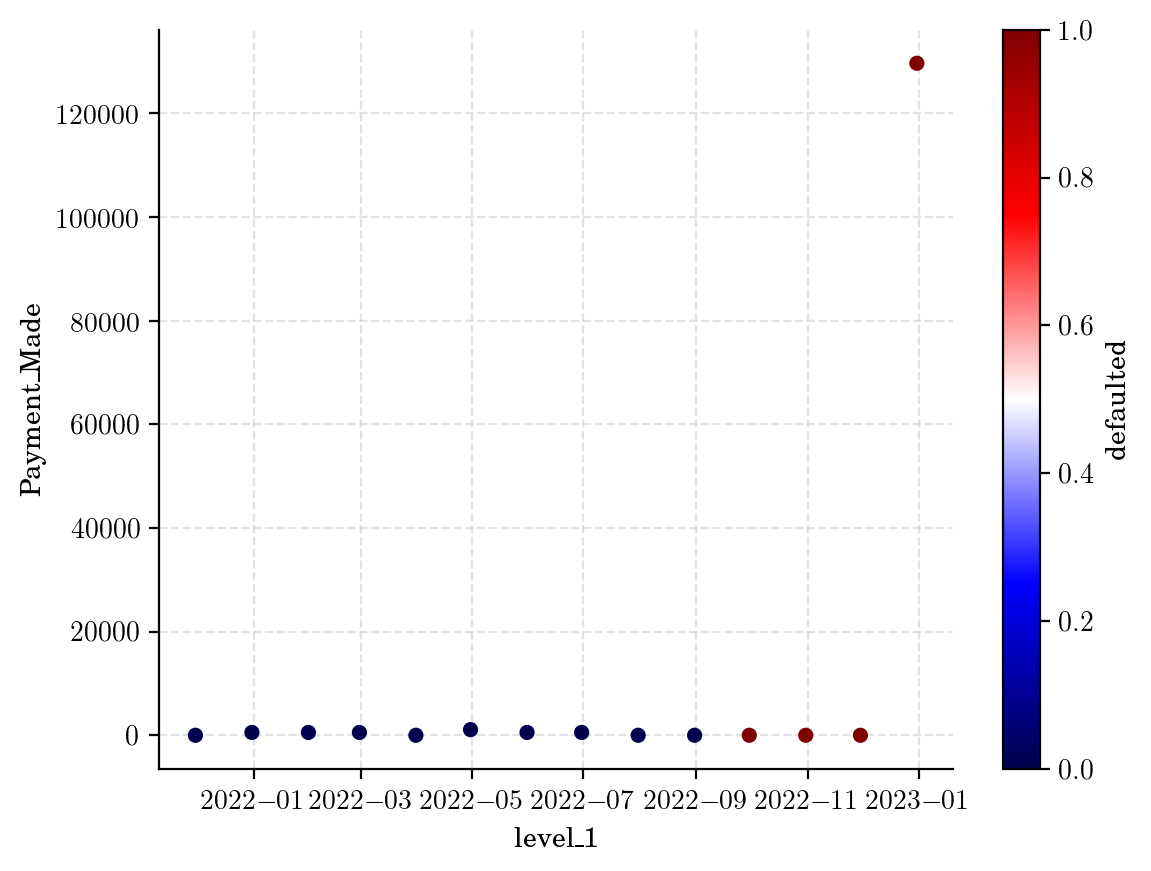

In [25]:
df.plot.scatter(
    x='level_1', y='Payment_Made', c='defaulted', colormap='seismic')
plt.show()

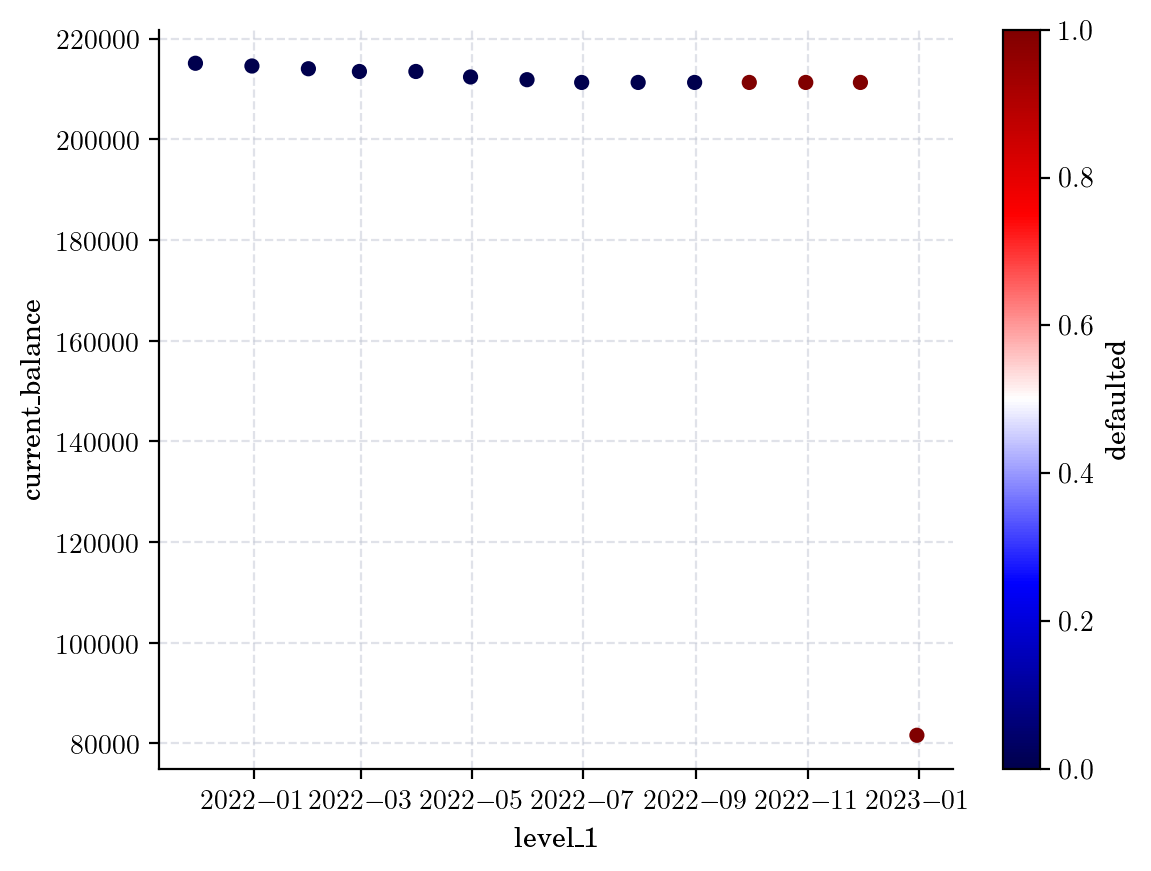

In [26]:
df.plot.scatter(
    x='level_1', y='current_balance', c='defaulted', colormap='seismic')
plt.show()

##  Static Columns 

These vary by loan but are the same for each calendar month:

- postdefault_recoveries: The cumulative recoveries post-default.
- prepayment_date: The date that the loan prepays (or nan if it does not).
- date_of_default: the date that the loan defaults (or nan if it does not).
- date_of_recovery: the date that a recovery is made on the loan, post-default.
- exposure_at_default: the current balance of the loan outstanding at default.
- recovery_percent: the postdefault_recoveries as a percentage of the exposure at default.

In [27]:
(df['defaulted']*df['Payment_Made']).cumsum()

41738         0.00
41739         0.00
41740         0.00
41741         0.00
41742         0.00
41743         0.00
41744         0.00
41745         0.00
41746         0.00
41747         0.00
41748         0.00
41749         0.00
41750         0.00
41751   129,665.97
dtype: float64

In [28]:
postdefault_recoveries = sum(df['defaulted']*df['Payment_Made'])
postdefault_recoveries

129665.974762305

In [29]:
df['postdefault_recoveries'] = postdefault_recoveries

Add `prepayment_date`: The date that the loan prepays (or nan if it does not).

In [30]:
df[['level_1', 'prepaid_in_month']]

,level_1,prepaid_in_month
41738,2021-11-30,False
41739,2021-12-31,False
41740,2022-01-31,False
41741,2022-02-28,False
41742,2022-03-31,False
41743,2022-04-30,False
41744,2022-05-31,False
41745,2022-06-30,False
41746,2022-07-31,False
41747,2022-08-31,False


In [31]:
type(df[df.prepaid_in_month == True]['level_1'])

pandas.core.series.Series

In [32]:
import numpy as np
if df.prepaid_in_month.any():
    prepayment_date = df[df.prepaid_in_month == True]['level_1'].item()
else:
    prepayment_date= np.nan
prepayment_date

Timestamp('2022-12-31 00:00:00')

In [33]:
df['prepayment_date']=prepayment_date

TODO: IS THIS A PREPAYMENT IF DEFAULTED?

Add attribute `date_of_default`: the date that the loan defaults (or nan if it does not).

In [34]:
date_of_default = df[df.default_in_month == True]['level_1'].item()
date_of_default

Timestamp('2022-09-30 00:00:00')

In [35]:
df['date_of_default'] = date_of_default

Add attribute `exposure_at_default`: the current balance of the loan outstanding at default.

In [36]:
exposure_at_default = df[df.default_in_month == True]['current_balance'].item()
exposure_at_default

211297.31757041108

In [37]:
df['exposure_at_default'] = exposure_at_default

Add `recovery_percent`: the postdefault_recoveries as a percentage of the exposure at default.

In [38]:
recovery_percent = postdefault_recoveries/exposure_at_default
recovery_percent

0.6136659767064773

In [39]:
df['recovery_percent'] = recovery_percent

Inspect the final data frame.

In [40]:
df

,loan_id,level_1,Balance,Payment_Due,Payment_Made,origination_date,investor_1_acquisition_date,reversion_date,original_balance,product,...,defaulted,recovery_in_month,is_recovery_payment,time_to_reversion,is_post_seller_purchsae_date,postdefault_recoveries,prepayment_date,date_of_default,exposure_at_default,recovery_percent
41738,1606,2021-11-30,"215,105.00",NaN,0.00,2021-11-30,2021-11-30,2023-11-30,215105,2,...,0,0.00,False,-24,False,"129,665.97",2022-12-31,2022-09-30,"211,297.32",0.61
41739,1606,2021-12-31,"215,105.00",543.95,543.95,2021-11-30,2021-11-30,2023-11-30,215105,2,...,0,0.00,False,-23,True,"129,665.97",2022-12-31,2022-09-30,"211,297.32",0.61
41740,1606,2022-01-31,"215,105.00",543.95,543.95,2021-11-30,2021-11-30,2023-11-30,215105,2,...,0,0.00,False,-22,True,"129,665.97",2022-12-31,2022-09-30,"211,297.32",0.61
41741,1606,2022-02-28,"215,105.00",543.95,543.95,2021-11-30,2021-11-30,2023-11-30,215105,2,...,0,0.00,False,-21,True,"129,665.97",2022-12-31,2022-09-30,"211,297.32",0.61
41742,1606,2022-03-31,"215,105.00",543.95,0.00,2021-11-30,2021-11-30,2023-11-30,215105,2,...,0,0.00,False,-20,True,"129,665.97",2022-12-31,2022-09-30,"211,297.32",0.61
41743,1606,2022-04-30,"215,105.00",543.95,"1,087.91",2021-11-30,2021-11-30,2023-11-30,215105,2,...,0,0.00,False,-19,True,"129,665.97",2022-12-31,2022-09-30,"211,297.32",0.61
41744,1606,2022-05-31,"215,105.00",543.95,543.95,2021-11-30,2021-11-30,2023-11-30,215105,2,...,0,0.00,False,-18,True,"129,665.97",2022-12-31,2022-09-30,"211,297.32",0.61
41745,1606,2022-06-30,"215,105.00",543.95,543.95,2021-11-30,2021-11-30,2023-11-30,215105,2,...,0,0.00,False,-17,True,"129,665.97",2022-12-31,2022-09-30,"211,297.32",0.61
41746,1606,2022-07-31,"215,105.00",543.95,0.00,2021-11-30,2021-11-30,2023-11-30,215105,2,...,0,0.00,False,-16,True,"129,665.97",2022-12-31,2022-09-30,"211,297.32",0.61
41747,1606,2022-08-31,"215,105.00",543.95,0.00,2021-11-30,2021-11-30,2023-11-30,215105,2,...,0,0.00,False,-15,True,"129,665.97",2022-12-31,2022-09-30,"211,297.32",0.61
